In [3]:
# Dependencies 
import pandas as pd
import matplotlib as plt
from pathlib import Path
import numpy as np
# plt.style.use("bmh")
import matplotlib.pyplot as plt


In [4]:
# File to Load
file = Path("../Resources/U.S._Chronic_Disease_Indicators.csv")


In [5]:
# Read U.S chronic desease data File and store into Pandas DataFrame
chronic_df = pd.read_csv(file, low_memory=True)

# Data Frame chronic disease, 5 first rows 
chronic_df.head()


,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,TopicID,QuestionID,ResponseID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2019,2019,GA,Georgia,BRFSS,Disability,Adults with any disability,NaN,%,Crude Prevalence,...,DIS,DIS01,NaN,CRDPREV,AGE,AGE65P,NaN,NaN,NaN,NaN
1,2019,2019,GU,Guam,BRFSS,Arthritis,Arthritis among adults,NaN,%,Crude Prevalence,...,ART,ART01,NaN,CRDPREV,SEX,SEXF,NaN,NaN,NaN,NaN
2,2019,2019,GU,Guam,BRFSS,Immunization,Influenza vaccination among adults,NaN,%,Crude Prevalence,...,IMM,IMM01,NaN,CRDPREV,SEX,SEXM,NaN,NaN,NaN,NaN
3,2019,2019,ME,Maine,BRFSS,Diabetes,Diabetes among adults,NaN,%,Crude Prevalence,...,DIA,DIA01,NaN,CRDPREV,SEX,SEXM,NaN,NaN,NaN,NaN
4,2019,2019,NV,Nevada,NVSS,Health Status,Life expectancy at birth,NaN,Years,Number,...,HEA,HEA06,NaN,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN


#Cleaning data

In [6]:
# Exploring to see all our columns 
chronic_df.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource',
       'Topic', 'Question', 'Response', 'DataValueUnit', 'DataValueType',
       'DataValue', 'DataValueAlt', 'DataValueFootnoteSymbol',
       'DataValueFootnote', 'LowConfidenceLimit', 'HighConfidenceLimit',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'StratificationCategory3', 'Stratification3',
       'Geolocation', 'LocationID', 'TopicID', 'QuestionID', 'ResponseID',
       'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1',
       'StratificationCategoryID2', 'StratificationID2',
       'StratificationCategoryID3', 'StratificationID3'],
      dtype='object')

In [7]:
# Exploring the whole data 
chronic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311745 entries, 0 to 311744
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   YearStart                  311745 non-null  int64  
 1   YearEnd                    311745 non-null  int64  
 2   LocationAbbr               311745 non-null  object 
 3   LocationDesc               311745 non-null  object 
 4   DataSource                 311745 non-null  object 
 5   Topic                      311745 non-null  object 
 6   Question                   311745 non-null  object 
 7   Response                   0 non-null       float64
 8   DataValueUnit              311745 non-null  object 
 9   DataValueType              311745 non-null  object 
 10  DataValue                  210684 non-null  float64
 11  DataValueAlt               210684 non-null  float64
 12  DataValueFootnoteSymbol    102758 non-null  object 
 13  DataValueFootnote          10

In [8]:
# Create a boolean series indicating columns with zero non-null values
empty_column_filter_series = chronic_df.count() == 0 
# Display the boolean series
empty_column_filter_series

YearStart                    False
YearEnd                      False
LocationAbbr                 False
LocationDesc                 False
DataSource                   False
Topic                        False
Question                     False
Response                      True
DataValueUnit                False
DataValueType                False
DataValue                    False
DataValueAlt                 False
DataValueFootnoteSymbol      False
DataValueFootnote            False
LowConfidenceLimit           False
HighConfidenceLimit          False
StratificationCategory1      False
Stratification1              False
StratificationCategory2       True
Stratification2               True
StratificationCategory3       True
Stratification3               True
Geolocation                  False
LocationID                   False
TopicID                      False
QuestionID                   False
ResponseID                    True
DataValueTypeID              False
StratificationCatego

In [9]:
# Selects the count of non-null values for columns identified as empty by empty_column_filter_series
chronic_df.count()[empty_column_filter_series]

Response                     0
StratificationCategory2      0
Stratification2              0
StratificationCategory3      0
Stratification3              0
ResponseID                   0
StratificationCategoryID2    0
StratificationID2            0
StratificationCategoryID3    0
StratificationID3            0
dtype: int64

In [10]:
# Get the names of columns with no data (identified by empty_column_filter_series)
empty_columns = chronic_df.count()[empty_column_filter_series].index
# Display empty_columns variable 
empty_columns

Index(['Response', 'StratificationCategory2', 'Stratification2',
       'StratificationCategory3', 'Stratification3', 'ResponseID',
       'StratificationCategoryID2', 'StratificationID2',
       'StratificationCategoryID3', 'StratificationID3'],
      dtype='object')

In [11]:
# Remove columns with no data (identified by empty_columns) from the DataFrame chronic_df
# inplace=True ensures the changes are made to chronic_df directly
chronic_df.drop(columns=empty_columns, inplace=True)

In [12]:
# Print the shape of the DataFrame chronic_df (number of rows, number of columns)
print(chronic_df.shape)
# Print the column names of the DataFrame chronic_df after dropping non-null columns 
chronic_df.columns

(311745, 24)


Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource',
       'Topic', 'Question', 'DataValueUnit', 'DataValueType', 'DataValue',
       'DataValueAlt', 'DataValueFootnoteSymbol', 'DataValueFootnote',
       'LowConfidenceLimit', 'HighConfidenceLimit', 'StratificationCategory1',
       'Stratification1', 'Geolocation', 'LocationID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1'],
      dtype='object')

#How has the prevalence of chronic diseases changed from 2015 to 2022, and are there any significant trends or patterns over time?

In [13]:
# Count occurrences of each year in the "YearStart" column
# We want to see this result to understand the distribution of data over the years
chronic_df["YearStart"].value_counts()

YearStart
2019    88823
2021    87600
2020    67999
2022    47125
2016     8760
2015     8760
2018     2678
Name: count, dtype: int64

In [14]:
# Count instances of each location abbreviation in the "LocationAbbr" column
chronic_df["LocationAbbr"].value_counts()

LocationAbbr
US    5809
TN    5796
GA    5794
ND    5794
MA    5794
OR    5794
MI    5794
MO    5794
CO    5794
NY    5794
CT    5794
AR    5794
MS    5794
VA    5794
WI    5794
DE    5794
NE    5794
HI    5794
UT    5794
LA    5794
MN    5794
IL    5794
DC    5794
WA    5794
VT    5794
ME    5794
PA    5794
WY    5794
NJ    5794
KS    5794
AL    5794
MT    5788
SD    5786
NM    5786
NH    5745
MD    5745
FL    5745
IA    5745
KY    5745
WV    5745
AK    5737
NC    5696
RI    5696
OK    5696
AZ    5688
CA    5647
OH    5647
IN    5647
TX    5647
ID    5647
NV    5647
SC    5647
PR    4212
VI    4015
GU    4015
Name: count, dtype: int64

In [15]:
# Count instances of each location description grouped by location abbreviation
location_counts = chronic_df.groupby("LocationAbbr")["LocationDesc"].value_counts()
location_counts


LocationAbbr  LocationDesc        
AK            Alaska                  5737
AL            Alabama                 5794
AR            Arkansas                5794
AZ            Arizona                 5688
CA            California              5647
CO            Colorado                5794
CT            Connecticut             5794
DC            District of Columbia    5794
DE            Delaware                5794
FL            Florida                 5745
GA            Georgia                 5794
GU            Guam                    4015
HI            Hawaii                  5794
IA            Iowa                    5745
ID            Idaho                   5647
IL            Illinois                5794
IN            Indiana                 5647
KS            Kansas                  5794
KY            Kentucky                5745
LA            Louisiana               5794
MA            Massachusetts           5794
MD            Maryland                5745
ME            Maine

In [16]:
# Count the number of unique values in each column of chronic_df
chronic_df.nunique()

YearStart                        7
YearEnd                          4
LocationAbbr                    55
LocationDesc                    55
DataSource                      14
Topic                           19
Question                       109
DataValueUnit                    8
DataValueType                   12
DataValue                    14852
DataValueAlt                 14852
DataValueFootnoteSymbol          9
DataValueFootnote                9
LowConfidenceLimit            8412
HighConfidenceLimit           8861
StratificationCategory1          5
Stratification1                 26
Geolocation                     54
LocationID                      55
TopicID                         19
QuestionID                     109
DataValueTypeID                 12
StratificationCategoryID1        5
StratificationID1               26
dtype: int64

In [17]:
# Sorting our locationAbbr provide a better view to analyse this column 
sorted(chronic_df["LocationAbbr"].unique())

['AK',
 'AL',
 'AR',
 'AZ',
 'CA',
 'CO',
 'CT',
 'DC',
 'DE',
 'FL',
 'GA',
 'GU',
 'HI',
 'IA',
 'ID',
 'IL',
 'IN',
 'KS',
 'KY',
 'LA',
 'MA',
 'MD',
 'ME',
 'MI',
 'MN',
 'MO',
 'MS',
 'MT',
 'NC',
 'ND',
 'NE',
 'NH',
 'NJ',
 'NM',
 'NV',
 'NY',
 'OH',
 'OK',
 'OR',
 'PA',
 'PR',
 'RI',
 'SC',
 'SD',
 'TN',
 'TX',
 'US',
 'UT',
 'VA',
 'VI',
 'VT',
 'WA',
 'WI',
 'WV',
 'WY']

In [18]:
# creating an array with the states without the territories 
states_array = ['AK',
 'AL',
 'AR',
 'AZ',
 'CA',
 'CO',
 'CT',
 'DE',
 'FL',
 'GA',
 'HI',
 'IA',
 'ID',
 'IL',
 'IN',
 'KS',
 'KY',
 'LA',
 'MA',
 'MD',
 'ME',
 'MI',
 'MN',
 'MO',
 'MS',
 'MT',
 'NC',
 'ND',
 'NE',
 'NH',
 'NJ',
 'NM',
 'NV',
 'NY',
 'OH',
 'OK',
 'OR',
 'PA',
 'RI',
 'SC',
 'SD',
 'TN',
 'TX',
 'UT',
 'VA',
 'VT',
 'WA',
 'WI',
 'WV',
 'WY']

In [19]:
# Filter the DataFrame
us_df = chronic_df[chronic_df["LocationAbbr"].isin(states_array)]
#Displaying dataframe 
us_df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,...,HighConfidenceLimit,StratificationCategory1,Stratification1,Geolocation,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
0,2019,2019,GA,Georgia,BRFSS,Disability,Adults with any disability,%,Crude Prevalence,44.0,...,47.1,Age,Age >=65,POINT (-83.62758034599966 32.83968109300048),13,DIS,DIS01,CRDPREV,AGE,AGE65P
3,2019,2019,ME,Maine,BRFSS,Diabetes,Diabetes among adults,%,Crude Prevalence,11.4,...,12.7,Sex,Male,POINT (-68.98503133599962 45.254228894000505),23,DIA,DIA01,CRDPREV,SEX,SEXM
4,2019,2019,NV,Nevada,NVSS,Health Status,Life expectancy at birth,Years,Number,78.0,...,78.2,Overall,Overall,POINT (-117.07184056399967 39.493240390000494),32,HEA,HEA06,NMBR,OVERALL,OVR
5,2019,2019,OH,Ohio,BRFSS,Arthritis,Arthritis among adults,%,Crude Prevalence,51.8,...,53.7,Age,Age >=65,POINT (-82.40426005599966 40.06021014100048),39,ART,ART01,CRDPREV,AGE,AGE65P
6,2019,2019,OK,Oklahoma,BRFSS,Arthritis,Arthritis among adults,%,Crude Prevalence,30.5,...,32.3,Sex,Female,POINT (-97.52107021399968 35.47203135600046),40,ART,ART01,CRDPREV,SEX,SEXF


In [20]:
#adding 0 for NaN values in column "DataValue"
us_cleaned_df = us_df.fillna({"DataValue": 0})
us_cleaned_df.head(800)

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,...,HighConfidenceLimit,StratificationCategory1,Stratification1,Geolocation,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
0,2019,2019,GA,Georgia,BRFSS,Disability,Adults with any disability,%,Crude Prevalence,44.0,...,47.1,Age,Age >=65,POINT (-83.62758034599966 32.83968109300048),13,DIS,DIS01,CRDPREV,AGE,AGE65P
3,2019,2019,ME,Maine,BRFSS,Diabetes,Diabetes among adults,%,Crude Prevalence,11.4,...,12.7,Sex,Male,POINT (-68.98503133599962 45.254228894000505),23,DIA,DIA01,CRDPREV,SEX,SEXM
4,2019,2019,NV,Nevada,NVSS,Health Status,Life expectancy at birth,Years,Number,78.0,...,78.2,Overall,Overall,POINT (-117.07184056399967 39.493240390000494),32,HEA,HEA06,NMBR,OVERALL,OVR
5,2019,2019,OH,Ohio,BRFSS,Arthritis,Arthritis among adults,%,Crude Prevalence,51.8,...,53.7,Age,Age >=65,POINT (-82.40426005599966 40.06021014100048),39,ART,ART01,CRDPREV,AGE,AGE65P
6,2019,2019,OK,Oklahoma,BRFSS,Arthritis,Arthritis among adults,%,Crude Prevalence,30.5,...,32.3,Sex,Female,POINT (-97.52107021399968 35.47203135600046),40,ART,ART01,CRDPREV,SEX,SEXF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,2015,2019,MD,Maryland,US Cancer DVT,Cancer,"Breast cancer mortality among all females, und...","per 100,000",Age-adjusted Rate,21.0,...,21.7,Sex,Female,POINT (-76.60926011099963 39.29058096400047),24,CAN,CAN02,AGEADJRATE,SEX,SEXF
837,2015,2019,KS,Kansas,US Cancer DVT,Cancer,Invasive cancer (all sites combined) mortality...,"per 100,000",Crude Rate,201.5,...,204.8,Sex,Male,POINT (-98.20078122699965 38.34774030000045),20,CAN,CAN08,CRDRATE,SEX,SEXM
838,2015,2019,FL,Florida,US Cancer DVT,Cancer,Colon and rectum (colorectal) cancer mortality...,"per 100,000",Age-adjusted Rate,15.1,...,15.4,Sex,Male,POINT (-81.92896053899966 28.932040377000476),12,CAN,CAN01,AGEADJRATE,SEX,SEXM
839,2015,2019,NM,New Mexico,US Cancer DVT,Cancer,"Breast cancer mortality among all females, und...",Number,Number,12.0,...,NaN,Race/Ethnicity,"American Indian or Alaska Native, non-Hispanic",POINT (-106.24058098499967 34.52088095200048),35,CAN,CAN02,NMBR,RACE,AIAN


In [21]:
# Reseting the index for a more aestethic view
us_chronic_df = us_cleaned_df.reset_index(drop=True)
us_chronic_df.head(10)

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,...,HighConfidenceLimit,StratificationCategory1,Stratification1,Geolocation,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
0,2019,2019,GA,Georgia,BRFSS,Disability,Adults with any disability,%,Crude Prevalence,44.0,...,47.1,Age,Age >=65,POINT (-83.62758034599966 32.83968109300048),13,DIS,DIS01,CRDPREV,AGE,AGE65P
1,2019,2019,ME,Maine,BRFSS,Diabetes,Diabetes among adults,%,Crude Prevalence,11.4,...,12.7,Sex,Male,POINT (-68.98503133599962 45.254228894000505),23,DIA,DIA01,CRDPREV,SEX,SEXM
2,2019,2019,NV,Nevada,NVSS,Health Status,Life expectancy at birth,Years,Number,78.0,...,78.2,Overall,Overall,POINT (-117.07184056399967 39.493240390000494),32,HEA,HEA06,NMBR,OVERALL,OVR
3,2019,2019,OH,Ohio,BRFSS,Arthritis,Arthritis among adults,%,Crude Prevalence,51.8,...,53.7,Age,Age >=65,POINT (-82.40426005599966 40.06021014100048),39,ART,ART01,CRDPREV,AGE,AGE65P
4,2019,2019,OK,Oklahoma,BRFSS,Arthritis,Arthritis among adults,%,Crude Prevalence,30.5,...,32.3,Sex,Female,POINT (-97.52107021399968 35.47203135600046),40,ART,ART01,CRDPREV,SEX,SEXF
5,2019,2019,WV,West Virginia,NVSS,Health Status,Life expectancy at birth,Years,Number,71.9,...,72.2,Sex,Male,POINT (-80.71264013499967 38.66551020200046),54,HEA,HEA06,NMBR,SEX,SEXM
6,2020,2020,AL,Alabama,BRFSS,Diabetes,Diabetes among adults,%,Crude Prevalence,5.0,...,6.8,Age,Age 18-44,POINT (-86.63186076199969 32.84057112200048),1,DIA,DIA01,CRDPREV,AGE,AGE1844
7,2020,2020,AK,Alaska,BRFSS,Disability,Adults with any disability,%,Crude Prevalence,20.8,...,23.8,Sex,Male,POINT (-147.72205903599973 64.84507995700051),2,DIS,DIS01,CRDPREV,SEX,SEXM
8,2020,2020,IL,Illinois,NVSS,Asthma,"Asthma mortality among all people, underlying ...",Number,Number,88.0,...,NaN,Sex,Female,POINT (-88.99771017799969 40.48501028300046),17,AST,AST01,NMBR,SEX,SEXF
9,2020,2020,KS,Kansas,BRFSS,Sleep,Short sleep duration among adults,%,Crude Prevalence,32.7,...,34.5,Sex,Male,POINT (-98.20078122699965 38.34774030000045),20,SLEP,SLP03,CRDPREV,SEX,SEXM


In [22]:
# Displaying name of columns 
us_chronic_df.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource',
       'Topic', 'Question', 'DataValueUnit', 'DataValueType', 'DataValue',
       'DataValueAlt', 'DataValueFootnoteSymbol', 'DataValueFootnote',
       'LowConfidenceLimit', 'HighConfidenceLimit', 'StratificationCategory1',
       'Stratification1', 'Geolocation', 'LocationID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1'],
      dtype='object')

In [23]:
# Dropping empty columns 
us_chronic_df = us_chronic_df.drop(columns=['LocationID','TopicID', 'QuestionID',
       'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1'], axis=1)
us_chronic_df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DataValueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,Geolocation
0,2019,2019,GA,Georgia,BRFSS,Disability,Adults with any disability,%,Crude Prevalence,44.0,44.0,NaN,NaN,41.0,47.1,Age,Age >=65,POINT (-83.62758034599966 32.83968109300048)
1,2019,2019,ME,Maine,BRFSS,Diabetes,Diabetes among adults,%,Crude Prevalence,11.4,11.4,NaN,NaN,10.2,12.7,Sex,Male,POINT (-68.98503133599962 45.254228894000505)
2,2019,2019,NV,Nevada,NVSS,Health Status,Life expectancy at birth,Years,Number,78.0,78.0,NaN,NaN,77.8,78.2,Overall,Overall,POINT (-117.07184056399967 39.493240390000494)
3,2019,2019,OH,Ohio,BRFSS,Arthritis,Arthritis among adults,%,Crude Prevalence,51.8,51.8,NaN,NaN,49.8,53.7,Age,Age >=65,POINT (-82.40426005599966 40.06021014100048)
4,2019,2019,OK,Oklahoma,BRFSS,Arthritis,Arthritis among adults,%,Crude Prevalence,30.5,30.5,NaN,NaN,28.7,32.3,Sex,Female,POINT (-97.52107021399968 35.47203135600046)


In [24]:
# How has the prevalence of chronic diseases changed from 2015 to 2022,
# and are there any significant trends or patterns over time?

# list all chronic diseases grouped and count them by year.
# example:
# cancer 2018-2018 30
# diabiits 2018 10
# ...
# -----  second version
# diabitis,          2015 , 2016, 2017
# Crude Prevalence   23      12    10
# Crude Rate         10%     15%   10%
#   asma          


    

In [25]:
#selecting the columns we want to work with 
chronic_per_year =us_chronic_df[["YearStart","LocationDesc","Topic","DataValueType","DataValue"]]
chronic_per_year

,YearStart,LocationDesc,Topic,DataValueType,DataValue
0,2019,Georgia,Disability,Crude Prevalence,44.0
1,2019,Maine,Diabetes,Crude Prevalence,11.4
2,2019,Nevada,Health Status,Number,78.0
3,2019,Ohio,Arthritis,Crude Prevalence,51.8
4,2019,Oklahoma,Arthritis,Crude Prevalence,30.5
...,...,...,...,...,...
287895,2022,Vermont,Mental Health,Crude Mean,7.2
287896,2022,Virginia,"Nutrition, Physical Activity, and Weight Status",Age-adjusted Prevalence,31.6
287897,2022,Washington,Sleep,Crude Prevalence,25.3
287898,2022,Utah,Immunization,Crude Prevalence,0.0


In [26]:
#transforming our dataframe with Topic and DataValueType as index and transposing the years into columns 
chronic_pivot_df = chronic_per_year.pivot_table(index=['Topic', 'DataValueType'], columns='YearStart', values='DataValue')
chronic_pivot_df.head(20)

YearStart                                                2015         2016  \
Topic     DataValueType                                                      
Alcohol   Age-adjusted Prevalence                         NaN          NaN   
          Age-adjusted Rate                               NaN          NaN   
          Crude 75th percentile                           NaN          NaN   
          Crude Median                                    NaN          NaN   
          Crude Prevalence                                NaN          NaN   
          Crude Rate                                      NaN          NaN   
          Number                                          NaN          NaN   
          Per capita alcohol consumption gallons          NaN          NaN   
Arthritis Age-adjusted Prevalence                         NaN          NaN   
          Crude Prevalence                                NaN          NaN   
Asthma    Age-adjusted Prevalence                         NaN          NaN   
          Age-adjusted Rate                               NaN          NaN   
          Crude Prevalence                                NaN          NaN   
          Crude Rate                                      NaN          NaN   
          Number                                          NaN          NaN   
Cancer    Age-adjusted Prevalence                         NaN          NaN   
          Age-adjusted Rate                         85.877000    81.541464   
          Crude Prevalence                                NaN          NaN   
          Crude Rate                                91.371429    88.418643   
          Number                                  2788.878571  2721.044286   

YearStart                                         2018        2019  \
Topic     DataValueType                                              
Alcohol   Age-adjusted Prevalence                  NaN   12.125800   
          Age-adjusted Rate                        NaN    8.062000   
          Crude 75th percentile                    NaN    3.537752   
          Crude Median                             NaN    2.107923   
          Crude Prevalence                         NaN   13.230683   
          Crude Rate                               NaN   11.533692   
          Number                                   NaN  271.016923   
          Per capita alcohol consumption gallons   NaN    2.468000   
Arthritis Age-adjusted Prevalence                  NaN   19.563486   
          Crude Prevalence                         NaN   22.525614   
Asthma    Age-adjusted Prevalence                  NaN    7.367800   
          Age-adjusted Rate                        NaN    0.362600   
          Crude Prevalence                         NaN    7.662500   
          Crude Rate                               NaN    0.511077   
          Number                                   NaN   18.849231   
Cancer    Age-adjusted Prevalence                  NaN         NaN   
          Age-adjusted Rate                        NaN         NaN   
          Crude Prevalence                         NaN         NaN   
          Crude Rate                               NaN         NaN   
          Number                                   NaN         NaN   

YearStart                                               2020        2021  \
Topic     DataValueType                                                    
Alcohol   Age-adjusted Prevalence                  11.746600   11.650000   
          Age-adjusted Rate                        10.815400   12.772000   
          Crude 75th percentile                     3.568450    3.493876   
          Crude Median                              2.137692    2.119077   
          Crude Prevalence                         11.639846   11.149756   
          Crude Rate                               14.414769   16.569385   
          Number                                  315.876923  346.243077   
          Per capita alcohol consumption gallons    2.5454

In [27]:
# Adding 0 to the Nan Values in the years columns 
chronic_pivot_df.fillna(0, inplace=True)
chronic_pivot_df.head(15)

YearStart                                         2015  2016  2018  \
Topic     DataValueType                                              
Alcohol   Age-adjusted Prevalence                  0.0   0.0   0.0   
          Age-adjusted Rate                        0.0   0.0   0.0   
          Crude 75th percentile                    0.0   0.0   0.0   
          Crude Median                             0.0   0.0   0.0   
          Crude Prevalence                         0.0   0.0   0.0   
          Crude Rate                               0.0   0.0   0.0   
          Number                                   0.0   0.0   0.0   
          Per capita alcohol consumption gallons   0.0   0.0   0.0   
Arthritis Age-adjusted Prevalence                  0.0   0.0   0.0   
          Crude Prevalence                         0.0   0.0   0.0   
Asthma    Age-adjusted Prevalence                  0.0   0.0   0.0   
          Age-adjusted Rate                        0.0   0.0   0.0   
          Crude Prevalence                         0.0   0.0   0.0   
          Crude Rate                               0.0   0.0   0.0   
          Number                                   0.0   0.0   0.0   

YearStart                                               2019        2020  \
Topic     DataValueType                                                    
Alcohol   Age-adjusted Prevalence                  12.125800   11.746600   
          Age-adjusted Rate                         8.062000   10.815400   
          Crude 75th percentile                     3.537752    3.568450   
          Crude Median                              2.107923    2.137692   
          Crude Prevalence                         13.230683   11.639846   
          Crude Rate                               11.533692   14.414769   
          Number                                  271.016923  315.876923   
          Per capita alcohol consumption gallons    2.468000    2.545400   
Arthritis Age-adjusted Prevalence                  19.563486    0.000000   
          Crude Prevalence                         22.525614    0.000000   
Asthma    Age-adjusted Prevalence                   7.367800    7.867400   
          Age-adjusted Rate                         0.362600    0.443800   
          Crude Prevalence                          7.662500    7.946167   
          Crude Rate                                0.511077    0.593538   
          Number                                   18.849231   22.467692   

YearStart                                               2021       2022  
Topic     DataValueType                                                  
Alcohol   Age-adjusted Prevalence                  11.650000  12.939800  
          Age-adjusted Rate                        12.772000   0.000000  
          Crude 75th percentile                     3.493876   3.762481  
          Crude Median                              2.119077   2.307846  
          Crude Prevalence                         11.149756  12.651385  
          Crude Rate                               16.569385   0.000000  
          Number                                  346.243077   0.000000  
          Per capita alcohol consumption gallons    2.586000   0.000000  
Arthritis Age-adjusted Prevalence                  18.810800  33.104200  
          Crude Prevalence                         21.618773  36.373538  
Asthma    Age-adjusted Prevalence                   8.250200   7.888800  
          Age-adjusted Rate                         0.351200   0.000000  
          Crude Prevalence                          8.333167   8.235385  
          Crude Rate                                0.464462   0.000000  
          Number                                   18.616923   0.000000

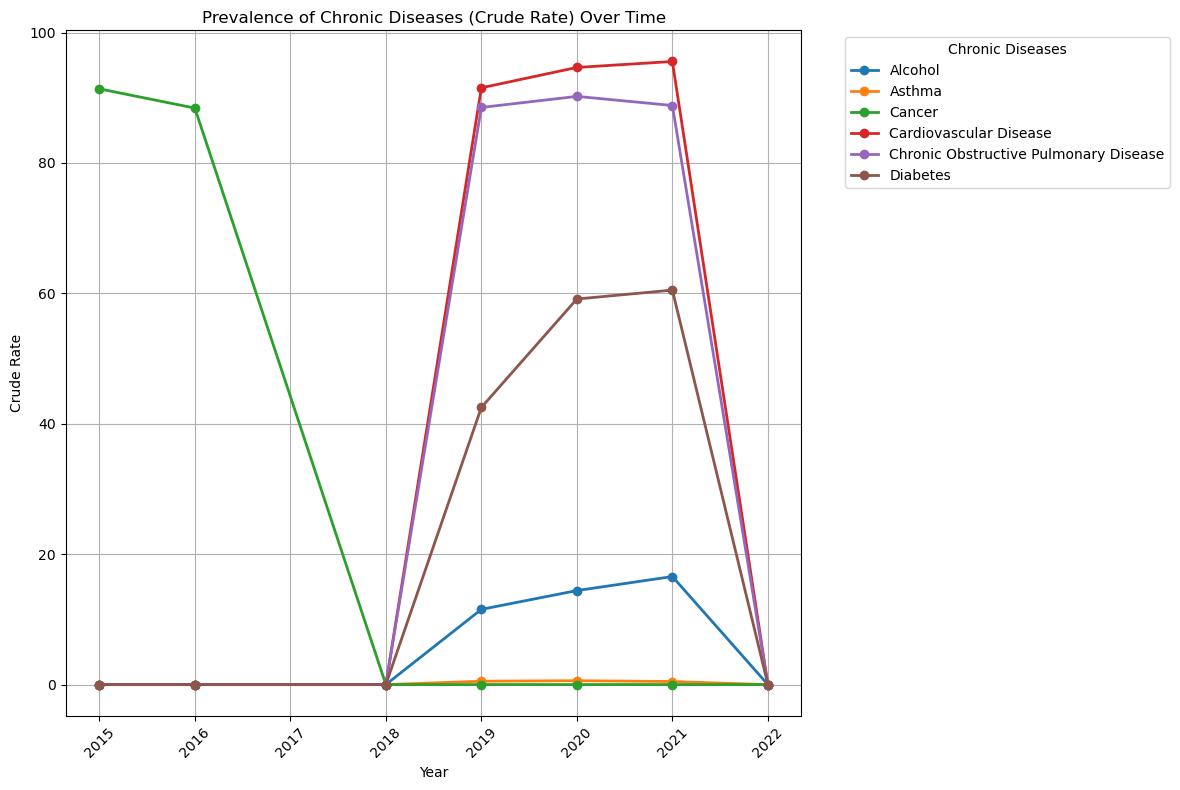

In [28]:

# Filter the DataFrame for 'Crude Rate' data value type
crude_rate_df = chronic_pivot_df.xs('Crude Rate', level='DataValueType')

# Plotting
# Plotting
crude_rate_df.T.plot(figsize=(12, 8), marker='o', linewidth=2)  # Plotting transposed DataFrame with marker style 'o' and linewidth 2

plt.title('Prevalence of Chronic Diseases (Crude Rate) Over Time')  # Setting title of the plot
plt.xlabel('Year')  # Setting label for x-axis
plt.ylabel('Crude Rate')  # Setting label for y-axis
plt.xticks(rotation=45)  # Rotating x-axis labels by 45 degrees
plt.legend(title='Chronic Diseases', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adding legend with title and adjusting position
plt.grid(True)  # Adding gridlines to the plot
plt.tight_layout()  # Adjusting layout to prevent overlapping elements
plt.show()  # Displaying the plot

In [29]:
#Filtering by crude rate, data value type
chronic_cleaned = chronic_pivot_df.loc[(slice(None), "Crude Rate"), :]
#Displaying dataframe
chronic_cleaned

,YearStart,2015,2016,2018,2019,2020,2021,2022
Topic,DataValueType,,,,,,,
Alcohol,Crude Rate,0.000000,0.000000,0.0,11.533692,14.414769,16.569385,0.0
Asthma,Crude Rate,0.000000,0.000000,0.0,0.511077,0.593538,0.464462,0.0
Cancer,Crude Rate,91.371429,88.418643,0.0,0.000000,0.000000,0.000000,0.0
Cardiovascular Disease,Crude Rate,0.000000,0.000000,0.0,91.525196,94.651196,95.565370,0.0
Chronic Obstructive Pulmonary Disease,Crude Rate,0.000000,0.000000,0.0,88.514840,90.214545,88.814445,0.0
Diabetes,Crude Rate,0.000000,0.000000,0.0,42.505154,59.136000,60.504000,0.0


In [40]:
cleaned_index = chronic_per_year.loc[(chronic_per_year["DataValueType"] == "Crude Rate"),:]


cleaned_index_df = cleaned_index.reset_index(drop=True)
cleaned_index.head(10)

# Filter data to incidents that caused Property or Contents Loss
# loss_df = fires_cleaned_df.loc[(fires_cleaned_df["Property Loss"] > 0) |
#                                (fires_cleaned_df["Contents Loss"] > 0) , :]
# loss_df.head()

,YearStart,LocationDesc,Topic,DataValueType,DataValue
33,2015,Colorado,Cancer,Crude Rate,0.0
35,2016,Idaho,Cancer,Crude Rate,0.0
38,2015,Texas,Cancer,Crude Rate,234.0
39,2015,North Carolina,Cancer,Crude Rate,0.0
41,2016,Louisiana,Cancer,Crude Rate,44.4
42,2016,Mississippi,Cancer,Crude Rate,653.0
44,2015,Virginia,Cancer,Crude Rate,497.3
46,2015,Wisconsin,Cancer,Crude Rate,25.2
47,2015,New York,Cancer,Crude Rate,2.0
50,2015,New York,Cancer,Crude Rate,345.5


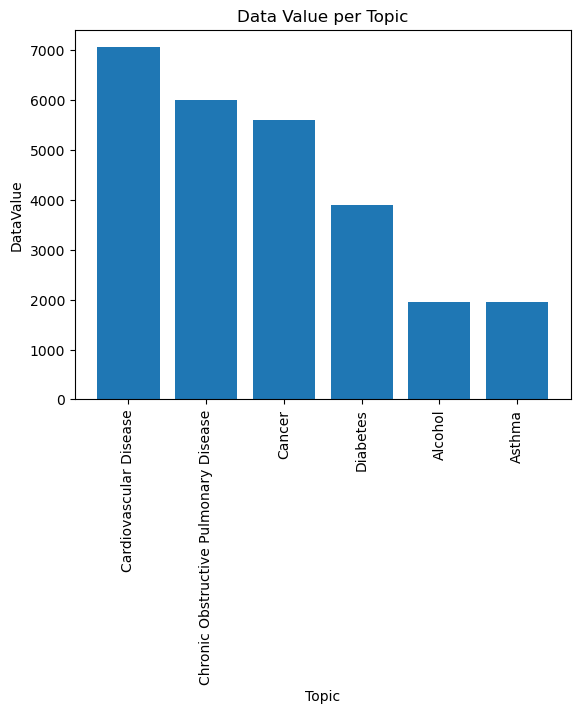

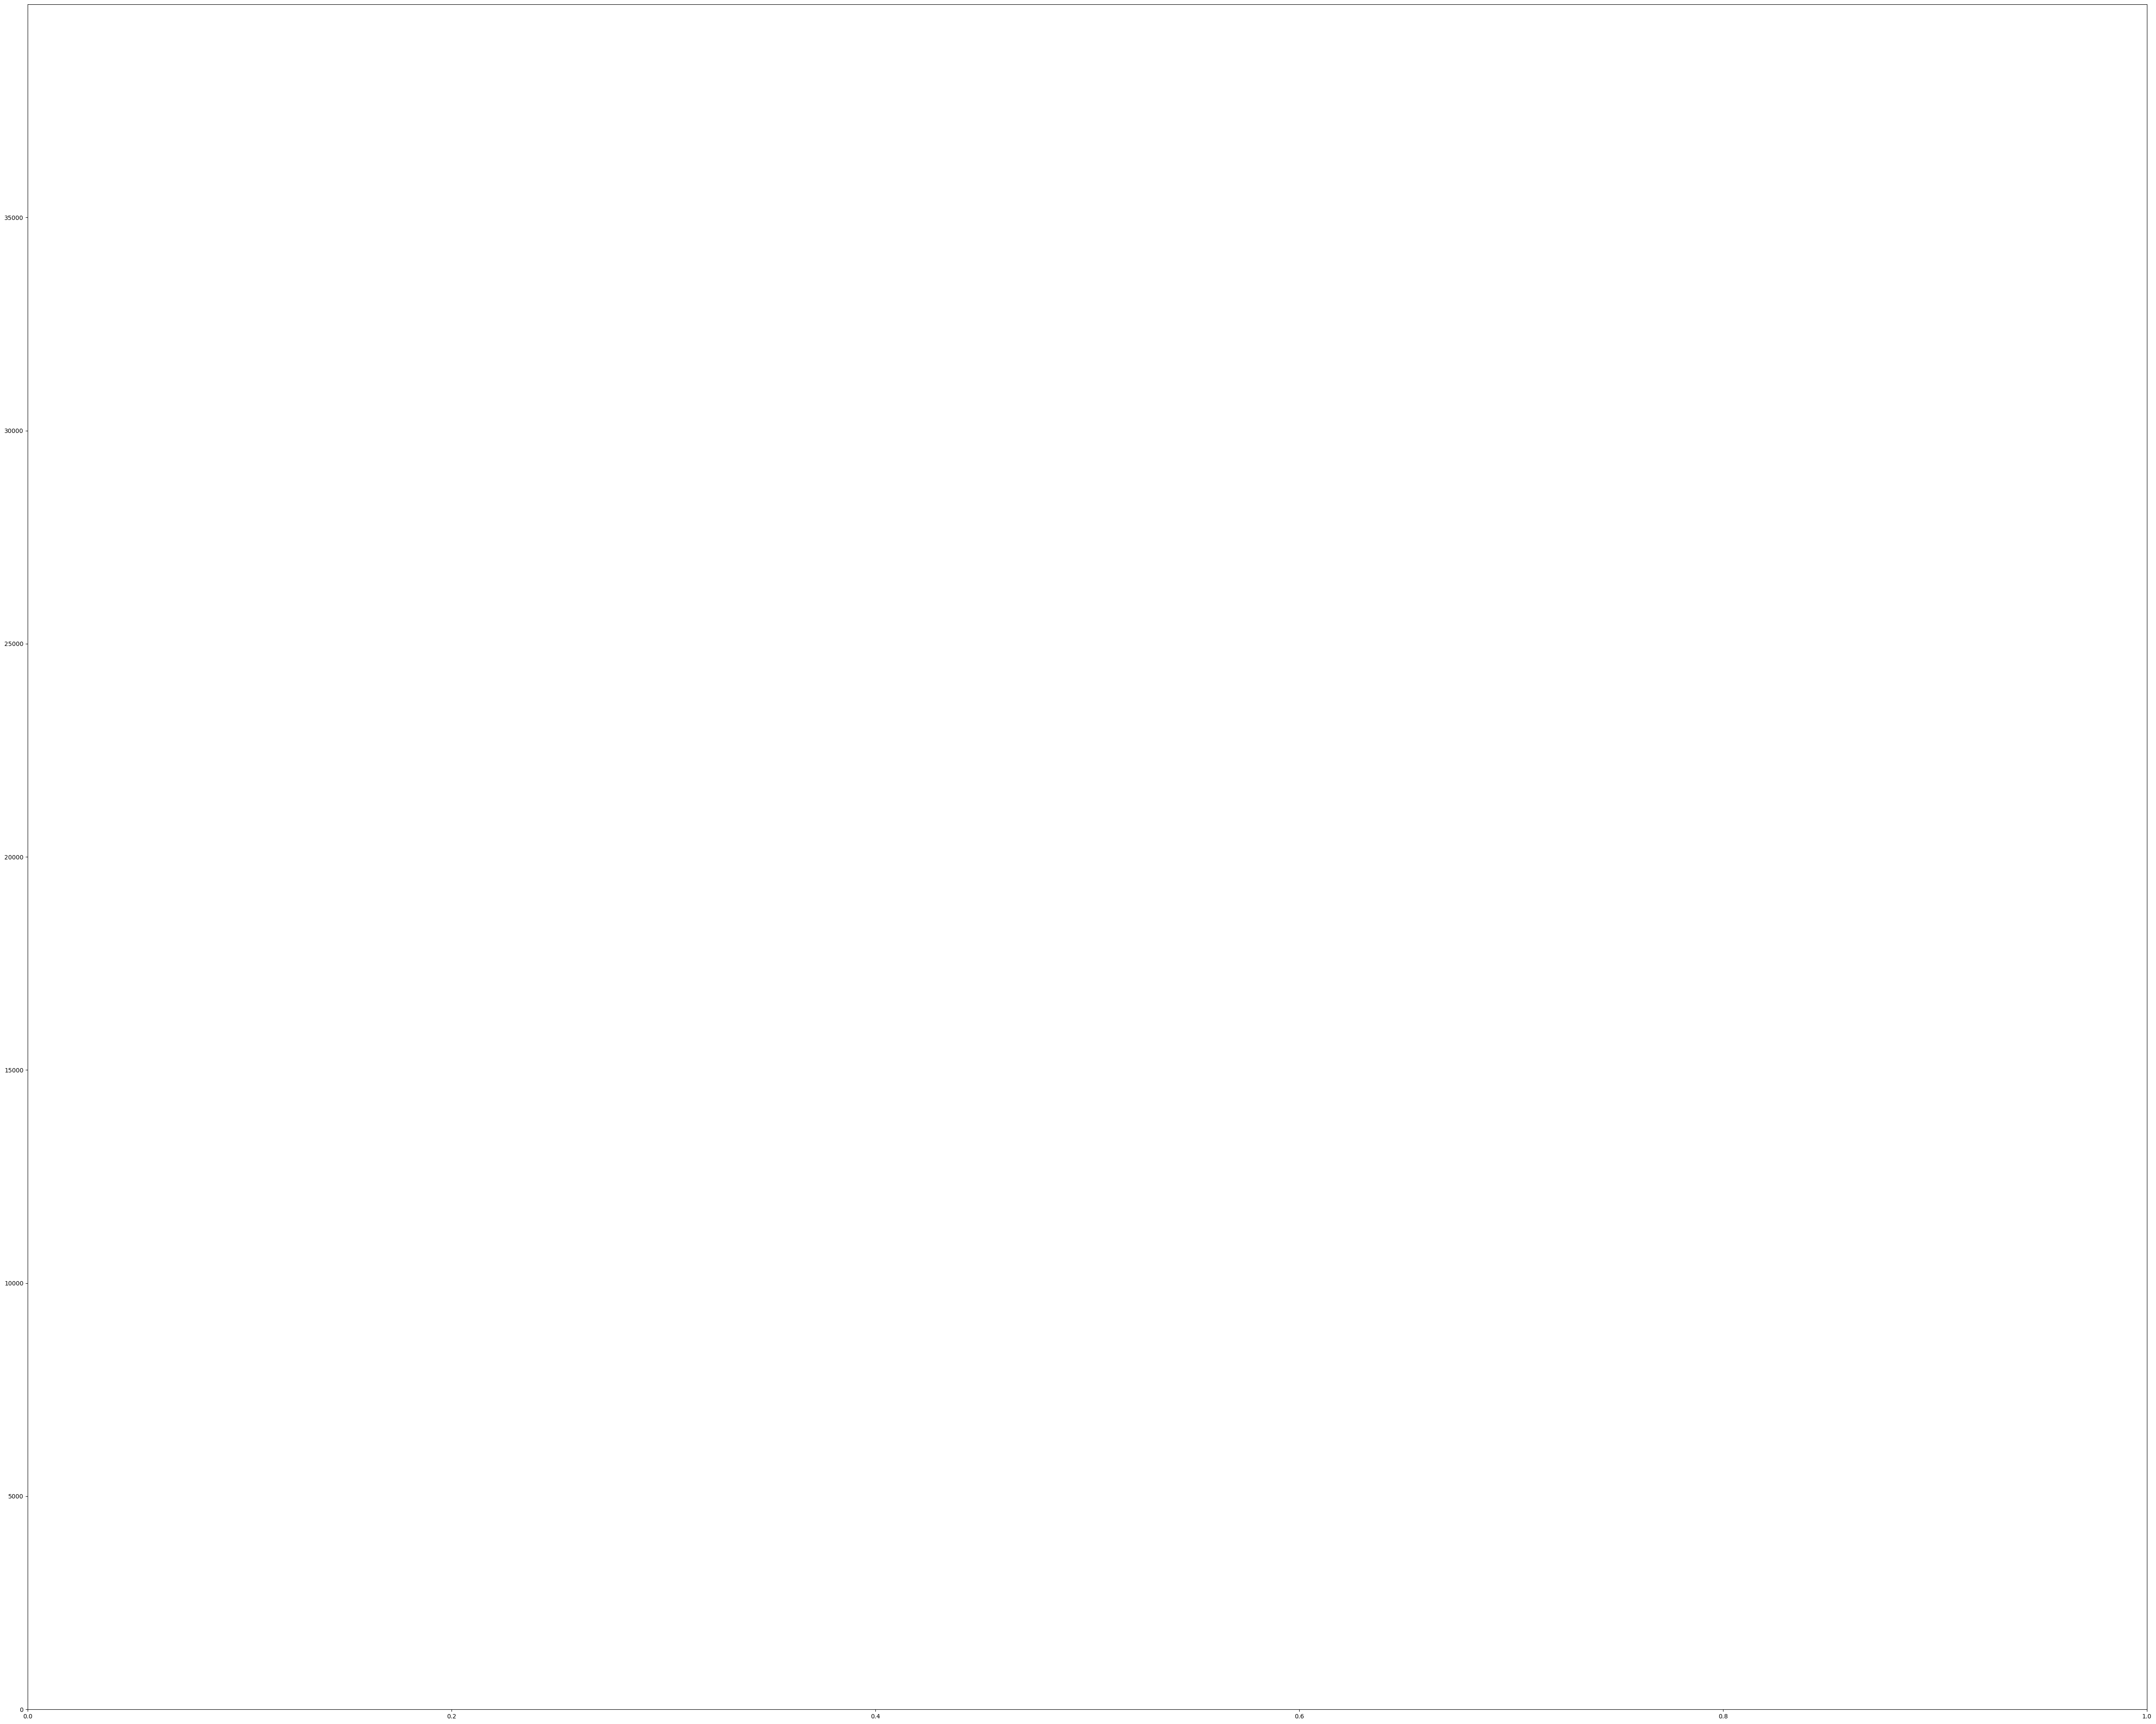

In [37]:
# Generate a bar plot showing the total number of rows (Data Value/Topic) for each chronic disease using pyplot.
# Calculate the total number of rows for each chronic disease

# Filter the DataFrame for 'Crude Rate' data value type
# crude_rate_df = chronic_pivot_df.xs('Crude Rate', level='DataValueType')

datavalue_topic = cleaned_index_df['Topic'].value_counts()

plt.bar(datavalue_topic.index, datavalue_topic.values)

# Create a bar plot using pyplot
plt.xlabel('Topic')
plt.ylabel('DataValue')
plt.title('Data Value per Topic')
plt.xticks(rotation=90)
plt.figure(figsize=(50,40))
plt.tight_layout()
custom_y_ticks = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000]  # Define your custom y ticks
plt.yticks(custom_y_ticks)
plt.ylim(0, max(custom_y_ticks)+5000)
plt.tight_layout()
plt.show()

In [32]:
year_start_array = us_chronic_df["YearStart"]
year_start_array

0         2019
1         2019
2         2019
3         2019
4         2019
          ... 
287895    2022
287896    2022
287897    2022
287898    2022
287899    2022
Name: YearStart, Length: 287900, dtype: int64

In [33]:
year_end_array = us_chronic_df["YearEnd"]
year_end_array

0         2019
1         2019
2         2019
3         2019
4         2019
          ... 
287895    2022
287896    2022
287897    2022
287898    2022
287899    2022
Name: YearEnd, Length: 287900, dtype: int64

In [34]:
year_range_dict = {"YearStart": year_start_array,
                   "YearEnd": year_end_array}
year_range_dict

{'YearStart': 0         2019
 1         2019
 2         2019
 3         2019
 4         2019
           ... 
 287895    2022
 287896    2022
 287897    2022
 287898    2022
 287899    2022
 Name: YearStart, Length: 287900, dtype: int64,
 'YearEnd': 0         2019
 1         2019
 2         2019
 3         2019
 4         2019
           ... 
 287895    2022
 287896    2022
 287897    2022
 287898    2022
 287899    2022
 Name: YearEnd, Length: 287900, dtype: int64}